<h1><center>Analysis of OSMI Mental Health Tech 2016</center></h1>

### **Author**: Julio Cárdenas-Rodríguez, [@julio](https://data.world/julio)
### License: MIT

<h1><center>Does gender affect the mental health status?</center></h1>

In [1]:
# modules and authors
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import seaborn

In [2]:
# load
df = pd.read_csv('https://query.data.world/s/bs6aqtm2l54gty0ng1vsgw37k')
# Get columns we need
df_status_gender = df[['Do you currently have a mental health disorder?','What is your gender?']].copy()
# rename the columns
df_status_gender.columns = ['Status','Gender']

## Clean Gender Strings

In [3]:
# make list of cases 
list_male_genders = ['male','Male ','MALE','Man','man','M','m','male ']
list_female_genders = ['female','female','female ','Female ','FEMALE','Woman','woman','F','f','fm']
# replace strings
for str_ in list_male_genders:
    df_status_gender.replace(str_,'Male',inplace=True)  
    
for str_ in list_female_genders:
    df_status_gender.replace(str_,'Female',inplace=True)

# confirm it worked
df_status_gender['Gender'].value_counts().iloc[:10]

Male                 1043
Female                329
non-binary              4
Nonbinary               2
Agender                 2
Male (cis)              2
M|                      1
Cisgender Female        1
Cis male                1
genderqueer woman       1
Name: Gender, dtype: int64

## Case 1:  Mental Health ==> Three Levels,    Gender ==> Two Levels

In [4]:
# keep on Female and Male (Analysis is easier)
idx1 = (df_status_gender['Gender']=='Female') | (df_status_gender['Gender']=='Male')
df1 = df_status_gender[idx1]

#Create Contigency Table
Cont_Table = pd.crosstab(pd.Categorical(df1.Gender),pd.Categorical(df1.Status))
Cont_Table.index.name = 'Gender'
Cont_Table.columns.name = 'Do you currently have a mental health disorder?'
Cont_Table

Do you currently have a mental health disorder?,Maybe,No,Yes
Gender,,,
Female,56,97,176
Male,259,423,361


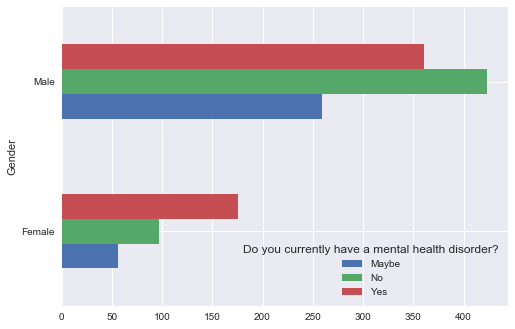

In [5]:
Cont_Table.plot.barh()

In [6]:
# Perform Statistical Test
chi2, p, _, expected_distribution = scipy.stats.chi2_contingency(Cont_Table.values)
def f():
    print('=='*20)
print("CASE 1")
f()
print('The p-value is : '+str(p))
f()
print('The test statistic is : '+str(chi2))
f()
print('The expected distribution is :')
print(np.round(expected_distribution))
f()

CASE 1
The p-value is : 7.10906559355e-09
The test statistic is : 37.5237900464
The expected distribution is :
[[  76.  125.  129.]
 [ 239.  395.  408.]]


## Case 2:  Mental Health ==> Two Levels,    Gender ==> Two Levels

In [7]:
idx2 = (df_status_gender['Status']=='Yes') | (df_status_gender['Status']=='No')
df2 = df_status_gender[idx2]

idx3 = (df2['Gender']=='Female') | (df2['Gender']=='Male')
df2 = df2[idx3]

#Create Contigency Table
Cont_Table = pd.crosstab(pd.Categorical(df2.Gender),pd.Categorical(df2.Status))
Cont_Table.index.name = 'Gender'
Cont_Table.columns.name = 'Do you currently have a mental health disorder?'
Cont_Table

Do you currently have a mental health disorder?,No,Yes
Gender,,
Female,97,176
Male,423,361


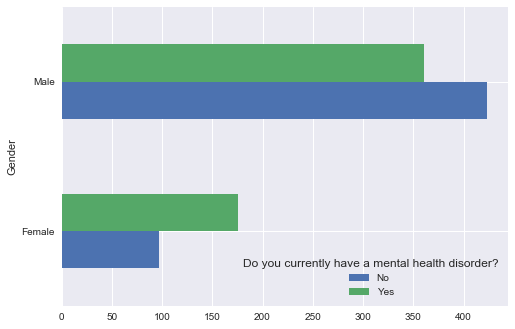

In [8]:
Cont_Table.plot.barh()

In [9]:
# Perform Statistical Test
chi2, p, _, expected_distribution = scipy.stats.chi2_contingency(Cont_Table.values)
def f():
    print('=='*20)
print("CASE 2")
f()
print('The p-value is : '+str(p))
f()
print('The test statistic is : '+str(chi2))
f()
print('The expected distribution is :')
print(np.round(expected_distribution))
f()

CASE 2
The p-value is : 2.29714216907e-07
The test statistic is : 26.7653958624
The expected distribution is :
[[ 134.  139.]
 [ 386.  398.]]
